In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
x = np.linspace(-10,10,100)
y1 = norm.pdf(x,loc=-3,scale=2)
y2 = norm.pdf(x,loc=3,scale=2)
p1 = 0.5
p2 = 1-p1

z = y1*p1/(y1*p1+y2*p2)
xx = np.log((1-z)/z)

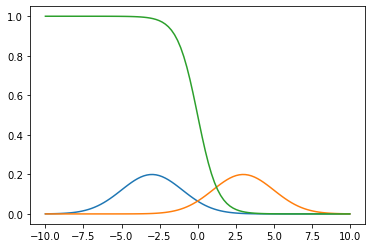

In [3]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,z)

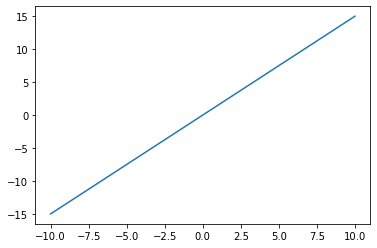

In [4]:
plt.plot(x,xx)

In [5]:
x1samp = norm.rvs(size=1000,loc=-3,scale=2)
x2samp = norm.rvs(size=1000,loc= 3,scale=2)

(array([  8.,  24.,  89., 168., 226., 231., 163.,  66.,  18.,   7.]),
 array([-3.18343636, -1.92928168, -0.67512699,  0.5790277 ,  1.83318238,
         3.08733707,  4.34149176,  5.59564644,  6.84980113,  8.10395582,
         9.3581105 ]),
 <BarContainer object of 10 artists>)

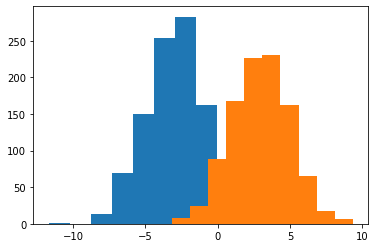

In [6]:
plt.hist(x1samp)
plt.hist(x2samp)

In [7]:
mu1 = np.mean(x1samp)
mu2 = np.mean(x2samp)
sigma2 = np.var(x1samp)
mu1, mu2, sigma2

(-2.969646265977711, 2.9901754487511454, 4.032534984639693)

In [8]:
beta1 = -(mu1-mu2)/sigma2
beta0 = -(mu2**2 - mu1**2)/2/sigma2
(beta0, beta1)

(-0.01517039154586343, 1.4779342863559473)

In [9]:
df = pd.DataFrame({'x':np.append(x1samp,x2samp),'y':np.append(np.zeros(1000),np.ones(1000))})
df

,x,y
0,-3.862097,0.0
1,-0.752378,0.0
2,-0.216506,0.0
3,-2.255674,0.0
4,-1.541970,0.0
...,...,...
1995,3.794084,1.0
1996,-0.215249,1.0
1997,1.158996,1.0
1998,2.646724,1.0


In [10]:
df['bin'] = pd.cut(df['x'],bins=20)

In [11]:
df2 = df.groupby('bin').agg('mean')
df2

,x,y
bin,,
"(-11.728, -10.654]",-11.706828,0.000000
"(-10.654, -9.6]",NaN,NaN
"(-9.6, -8.547]",NaN,NaN
"(-8.547, -7.494]",-7.917820,0.000000
"(-7.494, -6.441]",-6.986235,0.000000
"(-6.441, -5.387]",-5.869389,0.000000
"(-5.387, -4.334]",-4.791338,0.000000
"(-4.334, -3.281]",-3.824063,0.000000
"(-3.281, -2.228]",-2.765613,0.013699


In [12]:
def sigmoid(beta0,beta1,x):
    return 1/(1+np.exp(-beta0 - beta1*x))

In [13]:
model = LogisticRegression(random_state=0)
model.fit(df.iloc[:,:1],df['y'])

LogisticRegression(random_state=0)

In [14]:
model.coef_, model.intercept_

(array([[1.47449723]]), array([0.01816245]))

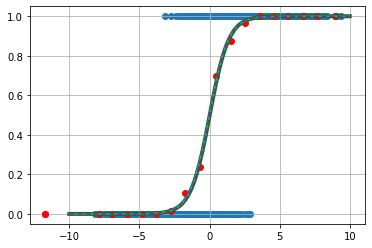

In [19]:
plt.scatter(df['x'],df['y'])
plt.plot(df2['x'],df2['y'],'ro')
plt.plot(x, sigmoid(beta0,beta1,x),'g',linewidth=4)
plt.plot(x, sigmoid(model.intercept_[0],model.coef_[0][0],x),'c')
plt.plot(x, sigmoid(0,6/4,x),'m--')
plt.grid()

In [16]:
beta0,beta1

(-0.01517039154586343, 1.4779342863559473)